Estimation of heart rate with peak detection

In [12]:
pip install heartpy

In [3]:
import heartpy as hp

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data=hp.get_data('e0103.csv')

In [6]:
data

array([0.455, 0.46 , 0.45 , ..., 0.565, 0.58 , 0.585])

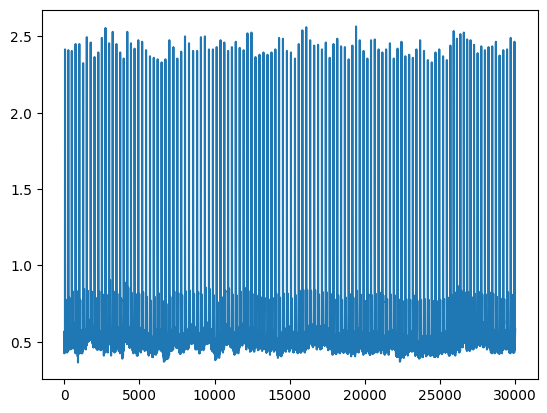

In [7]:
plt.plot(data)

The Ecg/Ekg signal

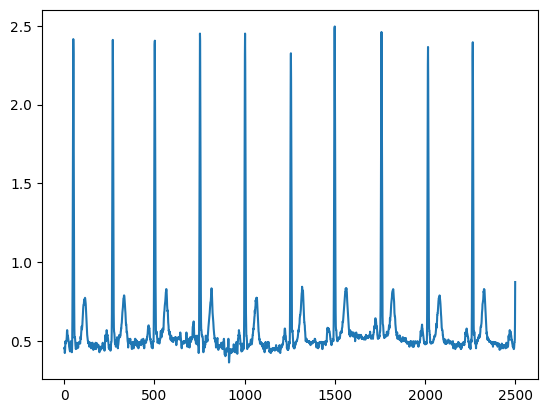

In [8]:
mag_data=data[0:2500]
plt.plot(mag_data)

Recursive peak detection method

In [13]:
peak_indices = []
peak_values = []
for i in range(10):  # Changed range to 10
    y = max(mag_data[250*i:250+250*(i)])
    x = np.where(mag_data == y)[0][0]
    peak_indices.append(x)
    peak_values.append(y)

In [14]:
peak_indices

[50, 269, 502, 752, 752, 1499, 1500, 1758, 2016, 2264]

In [15]:
len(peak_indices)
len(peak_values)
peak_indices
peak_values
peak_indices.remove(1499)
peak_values.remove(2.225)


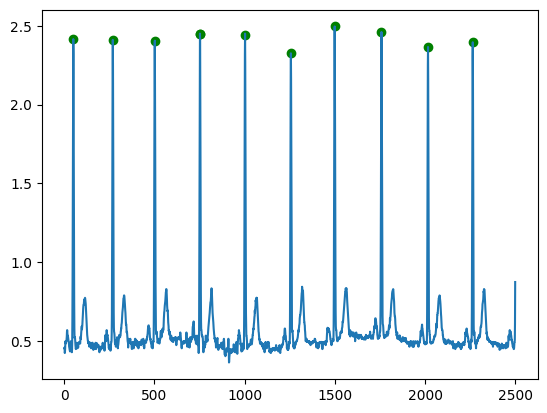

In [16]:
plt.plot(mag_data)
plt.scatter(peak_indices, peak_values, color='green', marker='o', label='peak')
y3 = max(mag_data[950:1100])
x3 = np.where(mag_data == y3)[0][0]
plt.scatter(1000,2.44, color='green', marker='o', label='peak')
y2 = max(mag_data[1150:1350])
x2 = np.where(mag_data == y2)[0][0]
plt.scatter(x2,y2, color='green', marker='o', label='peak')

Peak detection using Scipy library

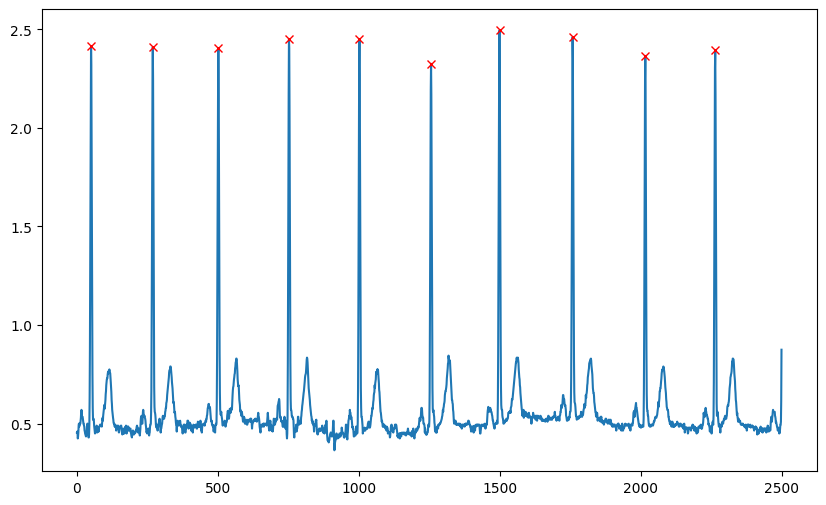

In [11]:
import numpy as np
from scipy.signal import find_peaks,detrend
import matplotlib.pyplot as plt

peaks, _ = find_peaks(mag_data, prominence=1)
peak_diff = np.diff(peaks)
plt.figure(figsize=(10, 6))
plt.plot(mag_data, label='Data')
plt.plot(peaks, data[peaks], 'x', color='red', label='Peaks')


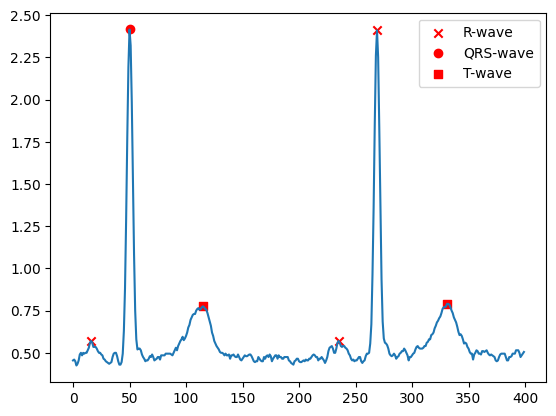

In [15]:
plt.plot(mag_data[0:400])
a_1 = max(mag_data[0:30])
b_1 = np.where(mag_data[0:48] == a_1)[0][0]
b_1 += 0
plt.scatter(b_1, a_1, color='red', marker='x', label='R-wave')

a_2 = max(mag_data[0:100])
b_2 = np.where(mag_data[0:100] == a_2)[0][0]
b_2 += 0
plt.scatter(b_2, a_2, color='red', marker='o', label='QRS-wave')

a_3 = max(mag_data[100:250])
b_3 = np.where(mag_data[100:250] == a_3)[0][0]
b_3 += 100
plt.scatter(b_3, a_3, color='red', marker='s', label='T-wave')

plt.legend()

a_4 = max(mag_data[200:250])
b_4 = np.where(mag_data[200:250] == a_4)[0][0]
b_4 += 200
plt.scatter(b_4, a_4, color='red', marker='x', label='peak')

a_5 = max(mag_data[250:300])
b_5 = np.where(mag_data[0:48] == a_1)[0][0]
b_5 += 253
plt.scatter(b_5, a_5, color='red', marker='x', label='peak')

a_6 = max(mag_data[300:350])
b_6 = np.where(mag_data[300:350] == a_6)[0][0]
b_6 += 300
plt.scatter(b_6, a_6, color='red', marker='s', label='peak')


In [17]:
array_sum = sum(peak_diff)
array_length = len(peak_diff)
average_diff = array_sum / array_length
print(average_diff)

246.0


In [16]:
# rr_interval=average_diff
print("heart rate",60/average_diff*1000)

heart rate 243.90243902439025


Data-2

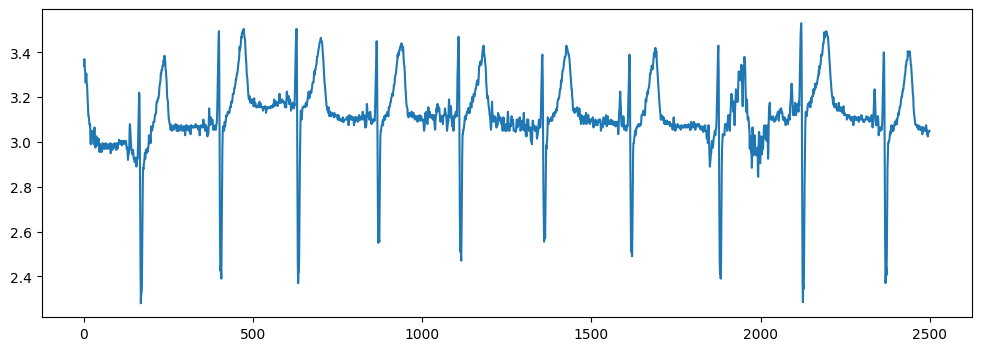

In [18]:
data_2=hp.get_data('e0110.csv')
plt.figure(figsize=(12,4))
plt.plot(data_2[0:2500])

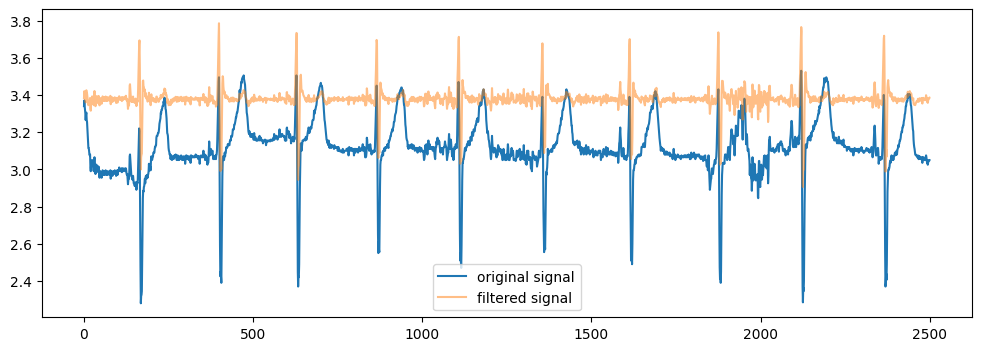

In [20]:
filtered = hp.filter_signal(data_2, cutoff = 0.05, sample_rate = 250, filtertype='notch')
plt.figure(figsize=(12,4))
plt.plot(data_2[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

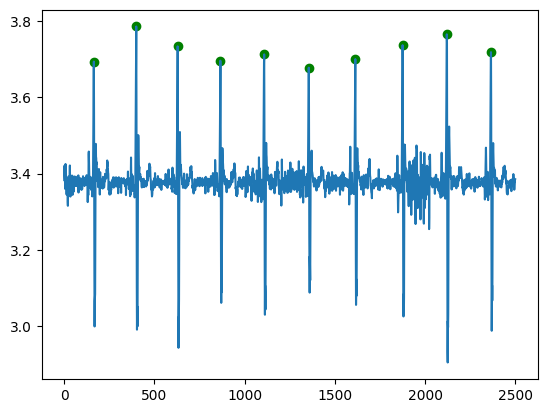

In [23]:
peak_indicess = []
peak_valuess = []
for i in range(10):  # Changed range to 10
    y = max(filtered[250*i:250+250*(i)])
    x = np.where(filtered == y)[0][0]
    peak_indicess.append(x)
    peak_valuess.append(y)
plt.plot(filtered[0:2500])
plt.scatter(peak_indicess, peak_valuess, color='green', marker='o', label='peak')

In [22]:
print(peak_indicess)

[164, 399, 628, 865, 1108, 1355, 1613, 1875, 2120, 2365]


In [21]:
print(peak_indicess)
difff = [second - first for first, second in zip(peak_indices[:-1], peak_indices[1:])]
print(difff)

[164, 399, 628, 865, 1108, 1355, 1613, 1875, 2120, 2365]
[219, 233, 250, 0, 748, 258, 258, 248]


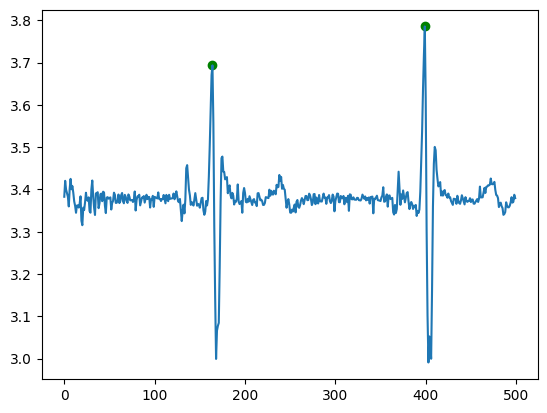

In [28]:
plt.plot(filtered[0:500])
plt.scatter(peak_indicess[0], peak_valuess[0], color='green', marker='o', label='peak')
plt.scatter(peak_indicess[1], peak_valuess[1], color='green', marker='o', label='peak')

In [23]:
array_sum = sum(difff)
array_length = len(difff)
average_difff = array_sum / array_length
print(average_difff)

276.75


In [24]:
# rr_interval=average_difff
print("heart rate",60/average_diff*1000)

heart rate 216.80216802168022
